<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sec.-3.1" data-toc-modified-id="Sec.-3.1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sec. 3.1</a></span><ul class="toc-item"><li><span><a href="#Intel-Price-returns" data-toc-modified-id="Intel-Price-returns-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Intel Price returns</a></span></li></ul></li><li><span><a href="#Sec.-3.3" data-toc-modified-id="Sec.-3.3-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sec. 3.3</a></span><ul class="toc-item"><li><span><a href="#ARCH-effect-(Intel-Price-returns)" data-toc-modified-id="ARCH-effect-(Intel-Price-returns)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ARCH effect (Intel Price returns)</a></span></li></ul></li></ul></div>

In [1]:
print(R.version)
file.path(R.home("bin"), "R")

               _                           
platform       x86_64-apple-darwin13.4.0   
arch           x86_64                      
os             darwin13.4.0                
system         x86_64, darwin13.4.0        
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               


[1] "/Users/karlzhang/miniforge3/envs/JTR/lib/R/bin/R"

In [13]:
library(TSA)


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [6]:
library(AFTSCode)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



# Sec. 3.1

## Intel Price returns 
- The Data are monthly simple returns. 
- The autocorrelation of returns and absolute returns.
- Interesting observations.
    - The `log(intc_rtn)` has almost no autocorrelation.

In [4]:
da = read.table("../AFTS_sol/data/m-intc7308.txt", header = T)
dim(da); da[1:5, ]

[1] 432   2

,date,rtn
,<int>,<dbl>
1,19730131,0.010050
2,19730228,-0.139303
3,19730330,0.069364
4,19730430,0.086486
5,19730531,-0.104478


In [8]:
intc = da$rtn
intc_ts = ts(intc, frequency = 12, start = c(1973, 1))
lg_intc = log(1+intc)
lg_intc_ts = ts(lg_intc, frequency = 12, start = c(1973, 1))

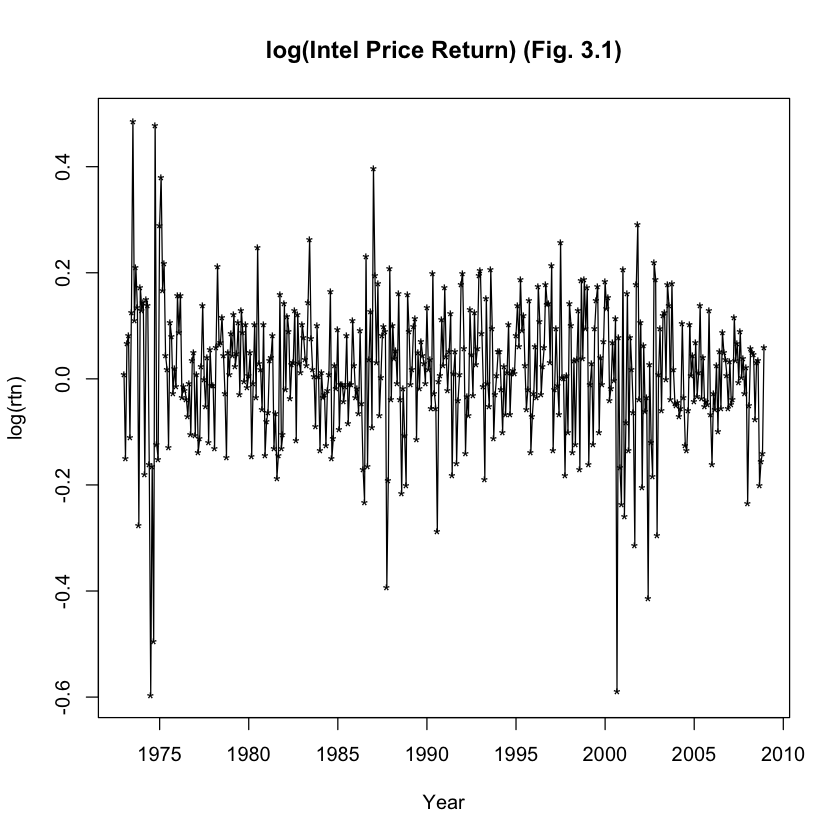

In [11]:
plot_time_fig(lg_intc_ts, main = "log(Intel Price Return) (Fig. 3.1)", xlab = "Year", ylab = "log(rtn)")

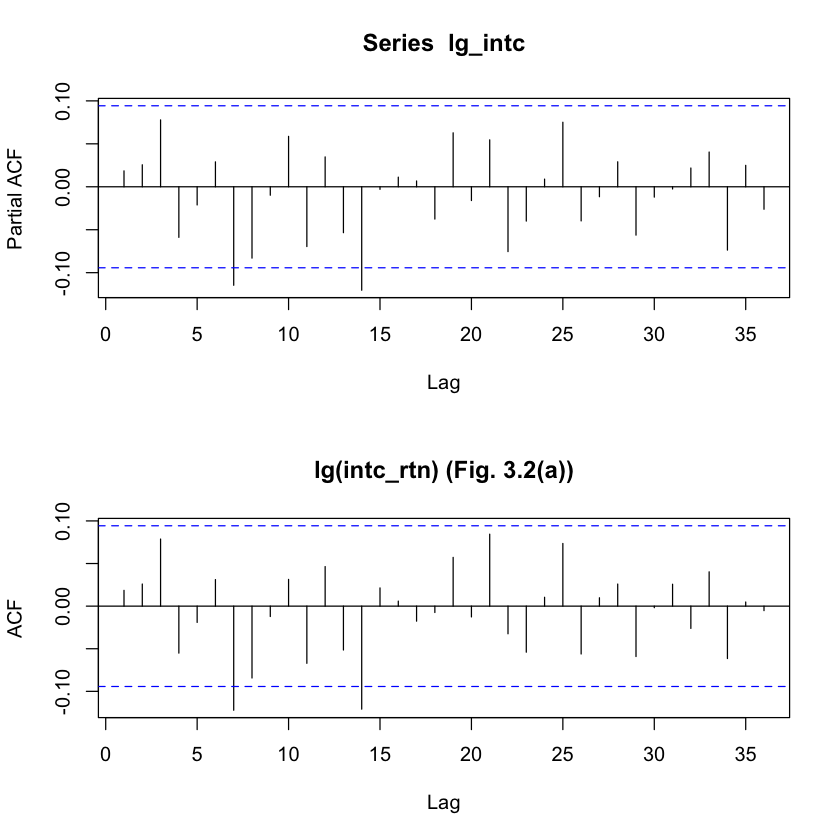

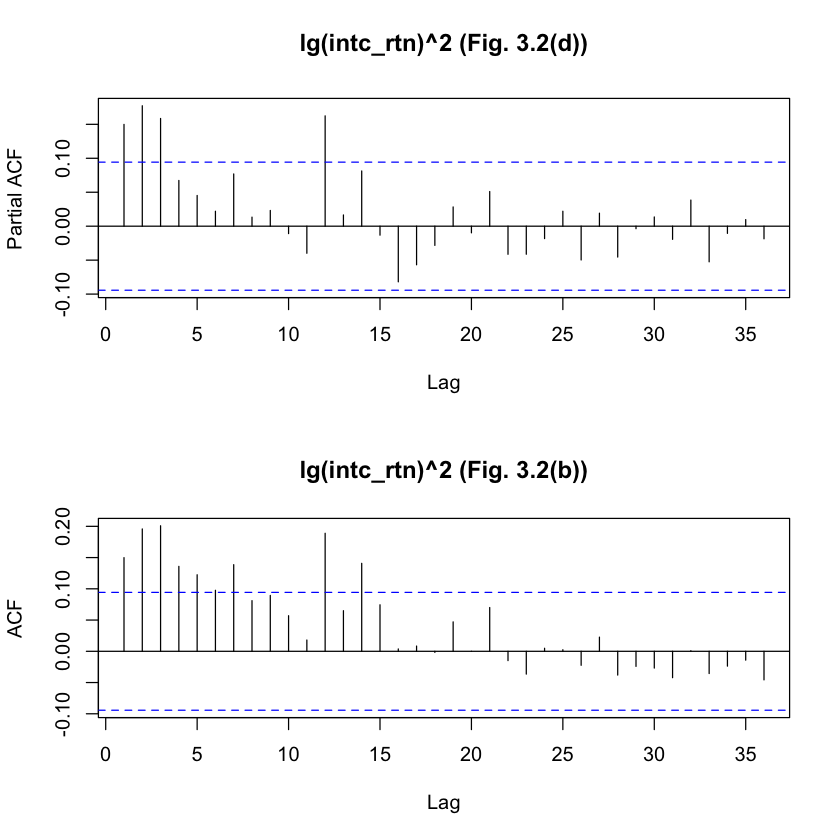

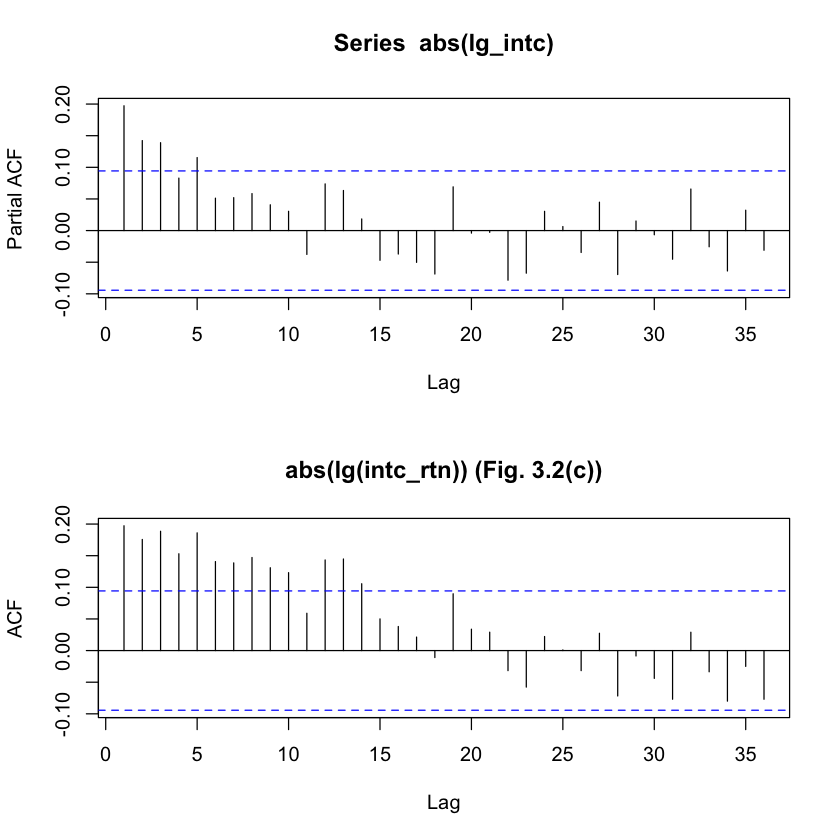

In [17]:
lag.max = 36
par(mfrow = c(2, 1), bg = 'white')
pacf(lg_intc, lag.max = lag.max)
acf(lg_intc, lag.max = lag.max, main = "lg(intc_rtn) (Fig. 3.2(a))") # TSA
pacf(lg_intc^2, lag.max = lag.max, main = "lg(intc_rtn)^2 (Fig. 3.2(d))")
acf(lg_intc^2, lag.max = lag.max, main = "lg(intc_rtn)^2 (Fig. 3.2(b))") # TSA
pacf(abs(lg_intc), lag.max = lag.max)
acf(abs(lg_intc), lag.max = lag.max, main = "abs(lg(intc_rtn)) (Fig. 3.2(c))") # TSA

# Sec. 3.3

## ARCH effect (Intel Price returns)
- The Data are monthly simple returns.
- Box-Ljung test shows no serial correlation.
- The Lagrange multiplier test shows strong ARCH effects for squared-residuals.

In [18]:
da = read.table("../AFTS_sol/data/m-intc7308.txt", header = T)
dim(da); da[1:5, ]

[1] 432   2

,date,rtn
,<int>,<dbl>
1,19730131,0.010050
2,19730228,-0.139303
3,19730330,0.069364
4,19730430,0.086486
5,19730531,-0.104478


In [19]:
intc = da$rtn
intc_ts = ts(intc, frequency = 12, start = c(1973, 1))
lg_intc = log(1+intc)
lg_intc_ts = ts(lg_intc, frequency = 12, start = c(1973, 1))

In [20]:
Box.test(lg_intc, lag = 12, type = 'Ljung')


	Box-Ljung test

data:  lg_intc
X-squared = 18.263, df = 12, p-value = 0.1079


In [21]:
at = intc - mean(intc) # mean function residuals
Box.test(at^2, lag = 12, type = 'Ljung')


	Box-Ljung test

data:  at^2
X-squared = 86.607, df = 12, p-value = 2.233e-13
